Analysis of Brooklyn Schools- Day 2
Anny H.LLosa

In [3]:
# Basic library imports

import pandas as pd
import numpy as np

print("Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")

Libraries loaded successfully
Pandas version: 2.3.3


In [4]:
# Load CSV file
try:
    df = pd.read_csv('high-school-directory.csv')
    print(df.head())
    
except FileNotFoundError:
    print("ERROR: 'high-school-directory.csv' not found")
    import glob
    for f in glob.glob("*.csv"):
        print(f"  - {f}")
except Exception as e:
    print(f"An error occurred: {e}")

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ... Council District Census Tract

In [5]:
# Cleaned column: lowercase letters and underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^a-z0-9_]', '', regex=True)
print("Cleaned colummns:", df.columns.tolist())

Cleaned colummns: ['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10', '

In [8]:
# Filter for Brooklyn schools
brooklyn_df = df[df["borough"].str.lower() == "brooklyn"].copy()
print(f"Schools in Brooklyn: {len(brooklyn_df)}")

Schools in Brooklyn: 121


In [9]:
# Assuming 'dbn' is the unique identifier
unique_schools = brooklyn_df["dbn"].nunique()
print(f"Total unique schools in Brooklyn: {unique_schools}")

Total unique schools in Brooklyn: 121


In [10]:
# Convert columns to numeric just in case
brooklyn_df['grade_span_min'] = pd.to_numeric(brooklyn_df['grade_span_min'], errors='coerce')
brooklyn_df['grade_span_max'] = pd.to_numeric(brooklyn_df['grade_span_max'], errors='coerce')

# 9 must be >= min_grade and <= max_grade
schools_9th_grade = brooklyn_df[
    (brooklyn_df['grade_span_min'] <= 9) & 
    (brooklyn_df['grade_span_max'] >= 9)
]

print(f"Schools offering 9th grade entry in Brooklyn: {len(schools_9th_grade)}")

Schools offering 9th grade entry in Brooklyn: 121


In [11]:
# Count of unique schools per borough
schools_per_borough = df.groupby('borough')['dbn'].nunique()
print("\nUnique schools per borough:")
print(schools_per_borough)


Unique schools per borough:
borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


In [12]:
# Average number of students per borough 
df['total_students'] = pd.to_numeric(df['total_students'], errors='coerce')
avg_students_per_borough = df.groupby('borough')['total_students'].mean()
print("\nAverage students per borough:")
print(avg_students_per_borough)


Average students per borough:
borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


In [13]:
# Summary of grade_span_max by borough
col_grade = "grade_span_max"
col_borough = "borough"
if col_grade in df.columns and col_borough in df.columns:
    df[col_grade] = pd.to_numeric(df[col_grade], errors='coerce')
    grade_summary = df.groupby(col_borough)[col_grade].describe()
    print("Summary of maximum grades by district:")
    print(f"Descriptive statistics of '{col_grade}' grouped by '{col_borough}':")
    print(grade_summary)
else:
    print("Cannot compute grade summary")
    print(f"Verify if Columns '{col_grade}' and '{col_borough}' not found in the dataset")

Summary of maximum grades by district:
Descriptive statistics of 'grade_span_max' grouped by 'borough':
               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


1.Bar Chart: Number of Schools by Council District “Brooklyn“

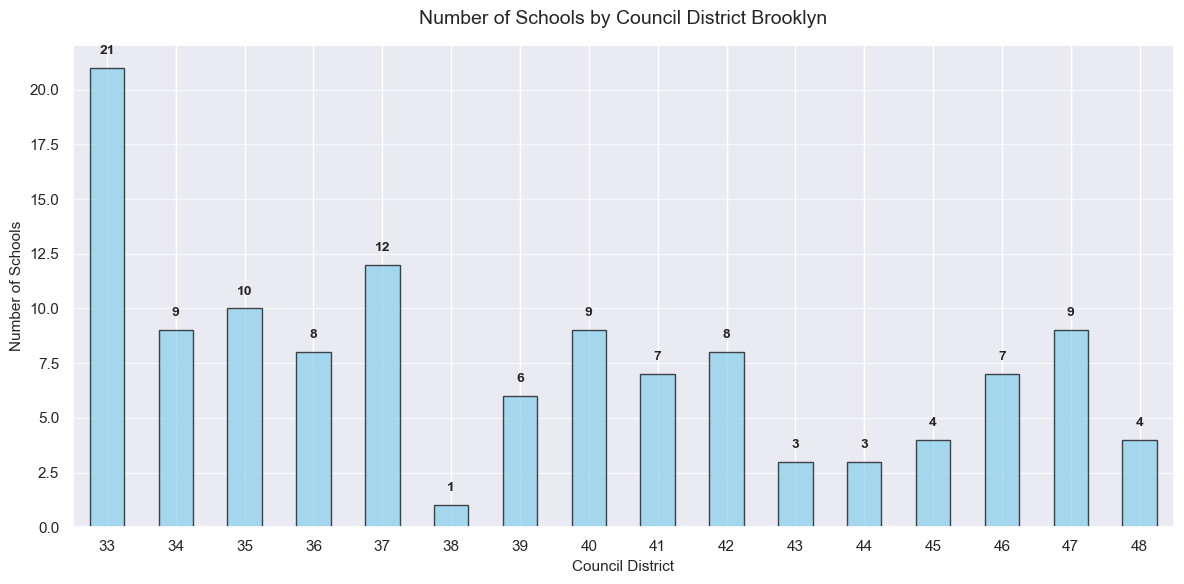

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

col_district = "council_district"

if col_district in brooklyn_df.columns:
    counts = brooklyn_df[col_district].dropna().astype(int).value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    counts.plot(kind="bar", color="skyblue", edgecolor="black", alpha=0.7)
    plt.title("Number of Schools by Council District Brooklyn", fontsize=14, pad=15)
    plt.xlabel("Council District", fontsize=11)
    plt.ylabel("Number of Schools", fontsize=11)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="-", alpha=0.7)

    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print(f"Cannot create visualization: Column '{col_district}' not found in dataset")

2.Pie Chart and Count Bar Chart: Brooklyn Educational Offer Summary


Educational Level Analysis in Brooklyn Schools


/var/folders/8h/_1bz0szd6718m8lc4l3bpt200000gn/T/ipykernel_12722/2969294074.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=level_counts.values, ax=ax2, palette="viridis")


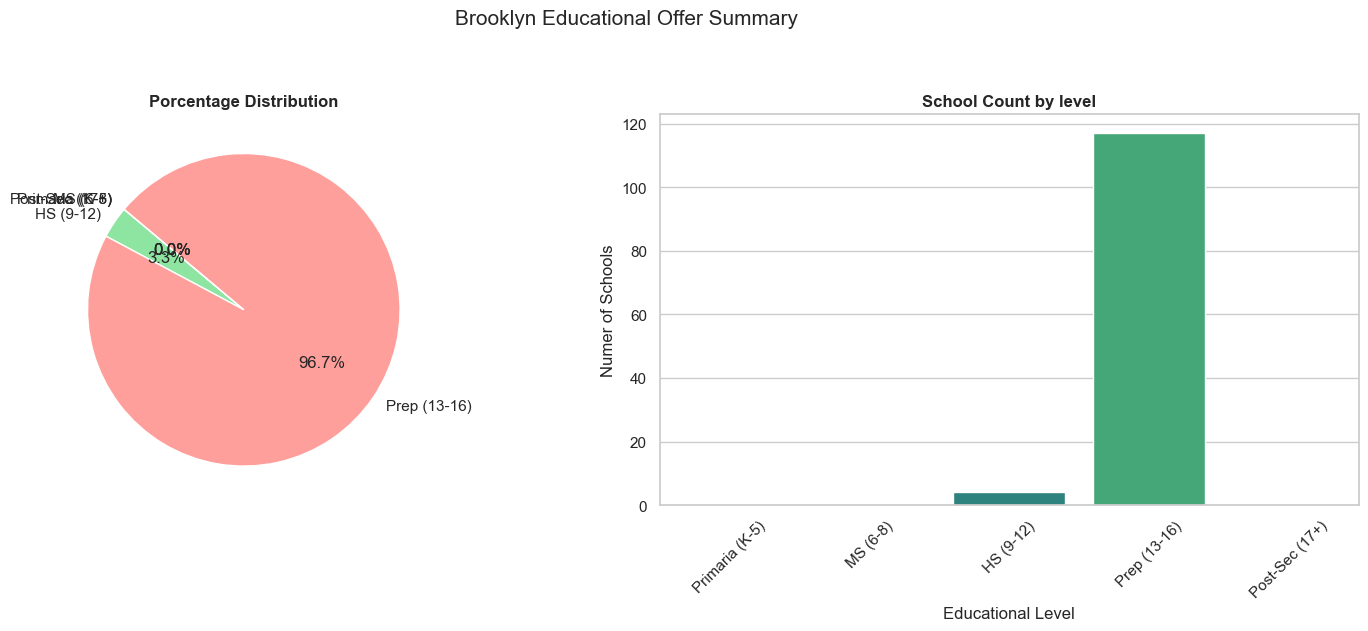

Analysis complete. Total schools analyzed: 121


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

print("\n" + "="*60)
print("Educational Level Analysis in Brooklyn Schools")
print("="*60)

if "grade_span_max" in brooklyn_df.columns:
    brooklyn_df["grade_span_max"] = pd.to_numeric(brooklyn_df["grade_span_max"], errors='coerce')
    bins = [0, 5, 8, 12, 16, 25]
    labels = ['Primaria (K-5)', 'MS (6-8)', 'HS (9-12)', 'Prep (13-16)', 'Post-Sec (17+)']
    brooklyn_df["education_level"] = pd.cut(
        brooklyn_df["grade_span_max"],
        bins=bins,
        labels=labels,
        right=False
)

    level_counts = brooklyn_df["education_level"].value_counts().sort_index()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    #Chart 1 Porcentage Pie Chart
    modern_colors = sns.color_palette("pastel")
    ax1.pie(
        level_counts,
        labels=level_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=modern_colors
)
    ax1.set_title('Porcentage Distribution', fontsize=12, fontweight='bold')
    #Chart 2 Count Bar Chart
    sns.barplot(x=level_counts.index, y=level_counts.values, ax=ax2, palette="viridis")
    ax2.set_title('School Count by level', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Numer of Schools')
    ax2.set_xlabel('Educational Level')
    plt.xticks(rotation=45)

    plt.suptitle('Brooklyn Educational Offer Summary', fontsize=15, y=1.05)
    plt.tight_layout()
    plt.show()

    # Mensaje de confirmación para el reporte
    print(f"Analysis complete. Total schools analyzed: {level_counts.sum()}")
else:
    print("Cannot create visualization: Column 'grade_span_max' not found in the dataset")

3.Bar Chart: Educational Capacity Analysis by District Brooklyn


Visualization: District Comparative Dashboard


/var/folders/8h/_1bz0szd6718m8lc4l3bpt200000gn/T/ipykernel_12722/5723060.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_data, x="council_district", y="school_count", ax=ax1, palette="Blues_d")
/var/folders/8h/_1bz0szd6718m8lc4l3bpt200000gn/T/ipykernel_12722/5723060.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_data, x="council_district", y="total_students", ax=ax2, palette="Reds_d")
/var/folders/8h/_1bz0szd6718m8lc4l3bpt200000gn/T/ipykernel_12722/5723060.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.ba

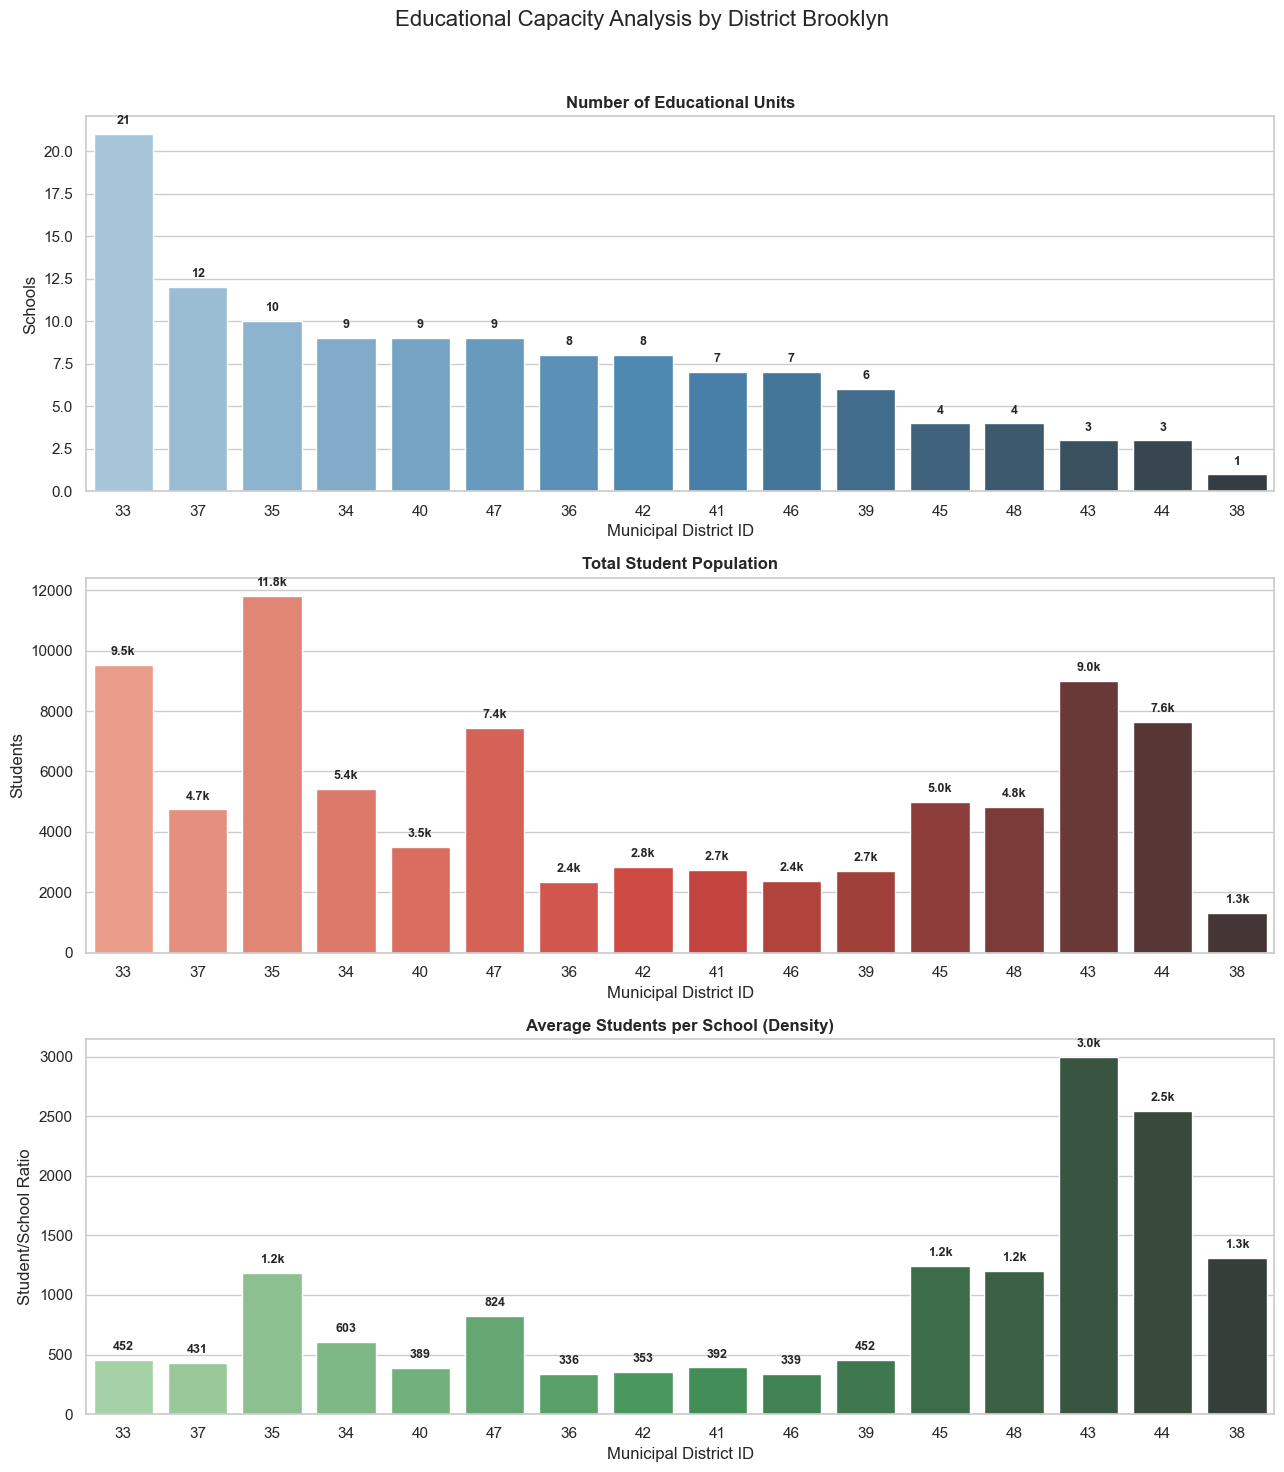

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

print("\n" + "="*60)
print("Visualization: District Comparative Dashboard")
print("="*60)

required = ["council_district", "total_students", "dbn"]
if all(col in brooklyn_df.columns for col in required):
    
    district_data = brooklyn_df.groupby("council_district").agg({
        "dbn": "count",
        "total_students": ["sum", "mean"]
    })
    
    district_data.columns = ["school_count", "total_students", "avg_students"]
    district_data = district_data.reset_index()
    
    district_data["council_district"] = district_data["council_district"].astype(int).astype(str)
    district_data = district_data.sort_values("school_count", ascending=False)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 15))
    
    # Chart 1: Number of Schools
    sns.barplot(data=district_data, x="council_district", y="school_count", ax=ax1, palette="Blues_d")
    ax1.set_title('Number of Educational Units', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Schools')

    # Chart 2: Student Population
    sns.barplot(data=district_data, x="council_district", y="total_students", ax=ax2, palette="Reds_d")
    ax2.set_title('Total Student Population', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Students')

    # Chart 3: Density (Students per School)
    sns.barplot(data=district_data, x="council_district", y="avg_students", ax=ax3, palette="Greens_d")
    ax3.set_title('Average Students per School (Density)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Student/School Ratio')

    for ax in [ax1, ax2, ax3]:
        ax.set_xlabel("Municipal District ID")
        for p in ax.patches:
            val = p.get_height()
            label = f'{val/1000:.1f}k' if val > 1000 else f'{int(val)}'
            ax.annotate(label, 
                        (p.get_x() + p.get_width() / 2., val), 
                        ha='center', va='bottom', fontsize=9, fontweight='bold', xytext=(0, 5),
                        textcoords='offset points')

    plt.suptitle('Educational Capacity Analysis by District Brooklyn', fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

else:
    missing = [c for c in required if c not in brooklyn_df.columns]
    print(f"Could not generate dashboard. Missing columns: {missing}")

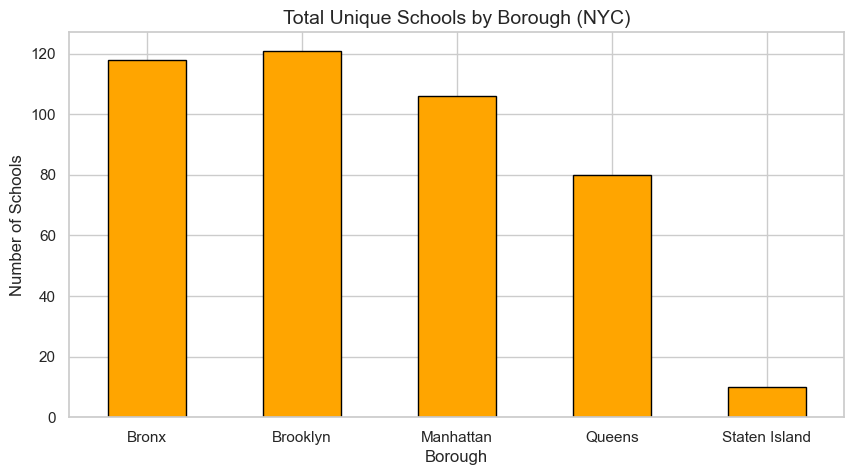

In [18]:
# Visualitazion: Comparison of unique schools by Borough
plt.figure(figsize=(10, 5))
schools_per_borough.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Unique Schools by Borough (NYC)', fontsize=14)
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=0)
plt.show()